# Data Mining Assignments (Python)
This notebook contains the setup and instructions for your Data Mining assignments.
Each section corresponds to one of the standards (PS.P.1 – PS.P.8).
Follow the instructions and fill in the code where indicated.

In [1]:
# Setup: imports and helper functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

sns.set_context('notebook')  # nicer default plotting
print('Libraries imported')
print("Setup complete!")

Libraries imported
Setup complete!


## Assignment 1: Addition Rule of Probability (PS.P.1)
Use the Iris dataset to calculate probabilities.

Tasks:
- Probability of Setosa.
- Probability of petal length > 3 cm.
- Probability of Setosa OR petal length > 3 cm.


In [ ]:
# Load Iris dataset into a table
iris = sns.load_dataset("iris")

#TODO: Find the probabilities of setosa in the 'species' column
p_setosa = ...

# TODO Probability of 'petal length' > 3
p_petal = ...

#TODO Probability of Setosa OR petal length > 3
p_union = ...

print("P(Setosa) =", p_setosa)
print("P(Petal length > 3) =", p_petal)
print("P(Setosa OR Petal length > 3) =", p_union)

P(Setosa) = 0.3333333333333333
P(Petal length > 3) = 0.66
P(Setosa OR Petal length > 3) = 0.9933333333333333


## Assignment 2: Multiplication Rule & Independence (PS.P.2)
Use the Breast Cancer dataset to test independence.

Tasks:
- Probability of malignant case.
- Probability of mean radius > 15.
- Joint probability and test for independence.

### Your code here:

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load dataset as table
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# TODO Event A: Malignant tumor, 0 = malignant in the tagert column
p_malignant = ...

# TODO Event B: Mean radius > 15
p_radius = ...

# TODO Both A and B together
p_both = ...

print("P(Malignant) =", p_malignant)
print("P(Radius > 15) =", p_radius)
print("P(Both) =", p_both)
print("P(A)*P(B) =", p_malignant * p_radius)

print(f'P(A)*P(B) = {p_malignant * p_radius:.6f}')
#1e-6 is our floating point tolerance, meaning any number below this value will be considered 0
if abs((p_malignant * p_radius) - p_both) < 1e-6: 
    print('Approximately independent (within floating point tolerance).')
else:
    print('Not independent: P(A ∩ B) != P(A)*P(B)')

P(Malignant) = 0.37258347978910367
P(Radius > 15) = 0.30404217926186294
P(Both) = 0.28295254833040423
P(A)*P(B) = 0.11328109315204735
P(A)*P(B) = 0.113281
Not independent: P(A ∩ B) != P(A)*P(B)


## Assignment 3: Counting Principles, Permutations & Combinations (PS.P.3)
Use the Wine dataset to calculate feature combinations.

Tasks:
- Number of combinations of 3 features from 13.
- Number of permutations of 3 features.
- Verify with itertools.

### Your code here:

In [ ]:
import itertools
n_features = 13

# TODO Combinations: choose 3 features without order
comb = ...

# TODO Permutations: choose 3 features with order
perm = ...

print("Number of combinations of 3 features:", comb)
print("Number of permutations of 3 features:", perm)

Number of combinations of 3 features: 286
Number of permutations of 3 features: 1716


## Assignment 4: Complementary Events (PS.P.4)
Use the Digits dataset.

Tasks:
- Probability of digit = 5.
- Probability of digit ≠ 5.
- Verify that P(A) + P(A^c) = 1.

### Your code here:

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target

# TODO find the probabilities of digit 5 and not digit 5
p_5 = ...
p_not5 = ...

print("P(Digit = 5) =", p_5)
print("P(Digit ≠ 5) =", p_not5)
print("Check: P(A) + P(A^c) =", p_5 + p_not5)

P(Digit = 5) = 0.10127991096271564
P(Digit ≠ 5) = 0.8987200890372844
Check: P(A) + P(A^c) = 1.0


## Assignment 5: Expected Value of a Random Variable (PS.P.5)
Use Iris dataset.

Tasks:
- Define random variable = petal length.
- Calculate expected value (mean).
- Interpret.

### Your code here:

Expected (mean) petal length = 3.7580 cm


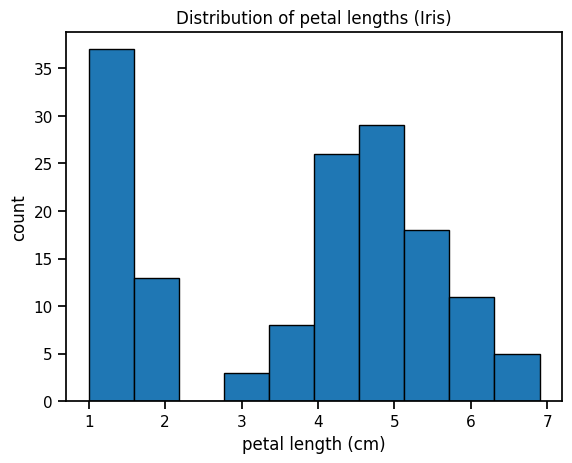

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
# Expected value of petal length (cm)
#TODO Load petal lengths into petal_lengths
petal_lengths = ...
expected_petal = ...
print(f'Expected (mean) petal length = {expected_petal:.4f} cm')
# Show histogram for visualization
plt.hist(petal_lengths, bins=10, edgecolor='black')
plt.title('Distribution of petal lengths (Iris)')
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

## Assignment 6: Risk & Decision Making (PS.P.6)
Use Breast Cancer dataset with a classifier.

Tasks:
- Train Naïve Bayes or Logistic Regression.
- Generate predictions.
- Build confusion matrix.
- Calculate probability of false positives and false negatives.

### Your code here:

Target names: ['malignant' 'benign']


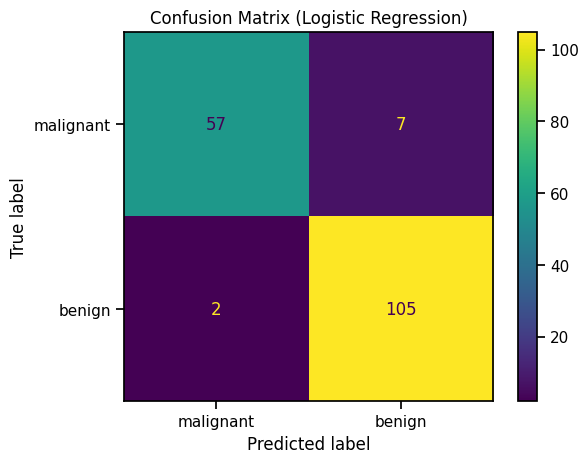

Test size: 171 (malignant: 64, benign: 107)
False positives count = 2, False negatives count = 7
Probability of false positive = 0.0117
Probability of false negative = 0.0409
Accuracy = 0.9474


In [ ]:
# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
# TODO Load data and target into X_cancer, y_cancer
X_cancer = ...
y_cancer = ... 

print('Target names:', cancer.target_names)  # usually ['malignant' 'benign'] or vice versa depending on sklearn version
df_cancer = pd.DataFrame(X_cancer, columns=cancer.feature_names)
df_cancer['target'] = y_cancer
# In sklearn: 0 = malignant, 1 = benign (check for accuracy)

# Map target to readable labels
label_map = {0: 'malignant', 1: 'benign'}
df_cancer['label'] = df_cancer['target'].map(label_map)

# Prepare data for modeling
X = df_cancer[cancer.feature_names]
y = df_cancer['target']  # 0 malignant, 1 benign
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  # rows: true, cols: pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ 'malignant', 'benign' ])
disp.plot()
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

tn, fp, fn, tp = cm.ravel()
total_test = cm.sum()
# For our mapping: assume 0 = malignant (positive class for "disease")
# False positive = predicted benign when true malignant? careful with definitions.
# We'll define:
# - Positive = malignant (0) → but sklearn ordering is [0,1], so:
# cm layout: [[TN, FP], [FN, TP]] if positive label is 1. To avoid confusion, compute rates directly:
# We'll compute:
# P(false positive) = false positives / total test = predicted positive when true negative? Better define:
# For medical context, let "malignant" be positive (disease present).
# Count: true_malignant = y_test==0
true_malignant = (y_test == 0).sum()
true_benign = (y_test == 1).sum()

# Compute using pandas comparison for clarity

#TODO predicted malignant (0) but true benign (1) -> false positive for malignant?
fp_count = ...

#TODO predicted benign (1) but true malignant (0) -> false negative for malignant
fn_count = ...

# TODO find the probabilities of false positive and false negative
p_fp = ...
p_fn = ...

print(f'Test size: {len(y_test)} (malignant: {true_malignant}, benign: {true_benign})')
print(f'False positives count = {fp_count}, False negatives count = {fn_count}')
print(f'Probability of false positive = {p_fp:.4f}')
print(f'Probability of false negative = {p_fn:.4f}')
print(f'Accuracy = {accuracy_score(y_test, y_pred):.4f}')

## Assignment 7: Probability Distributions & Expected Value (PS.P.8)
Use the Digits dataset.

Tasks:
- Create probability distribution for digits 0–9.
- Compute expected value.
- Interpret.

### Your code here:

In [ ]:
# Probability distribution for digits 0-9
digits = datasets.load_digits()
y_digits = digits.target
unique, counts = np.unique(y_digits, return_counts=True)

# TODO build the probability distribution as a pandas Series
prob_dist = ...
prob_dist = prob_dist.sort_index()
print('Probability distribution for digits (0-9):')
display(prob_dist)

# Expected value of digit value (treat digits as numeric random variable)
values = prob_dist.index.values
expected_digit = (values * prob_dist.values).sum()
print(f'Expected digit value (weighted average) = {expected_digit:.4f}')

Probability distribution for digits (0-9):


0    0.099054
1    0.101280
2    0.098497
3    0.101836
4    0.100723
5    0.101280
6    0.100723
7    0.099610
8    0.096828
9    0.100167
dtype: float64

Expected digit value (weighted average) = 4.4908


## Assignment 8: Capstone Simulation (PS.P.1 – PS.P.8)
Use sklearn.datasets.make_classification.

Tasks:
- Generate 2-class dataset (500 points).
- Apply probability rules.
- Build distributions and calculate expected values.
- Train classifier and analyze confusion matrix.
- Provide visualizations.

### Your code here:

P(class=1) = 0.5020
P(f1 > 0) = 0.8940
P(class=1 AND f1>0) = 0.4520
P(class=1)*P(f1>0) = 0.4488 (compare to joint)
Expected f1 = 1.0217, Expected f2 = 0.0025


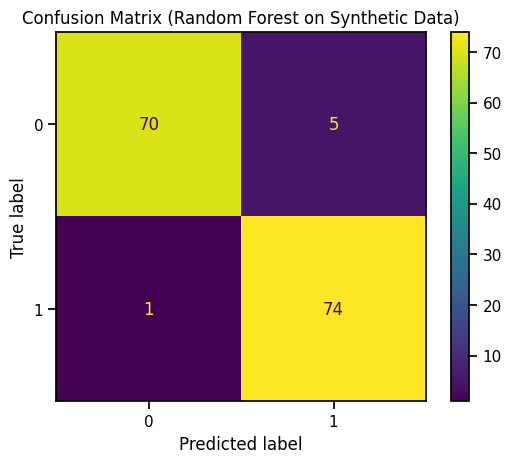

False positive rate (count/total) = 5/150 = 0.0333
False negative rate (count/total) = 1/150 = 0.0067
Accuracy = 0.9600


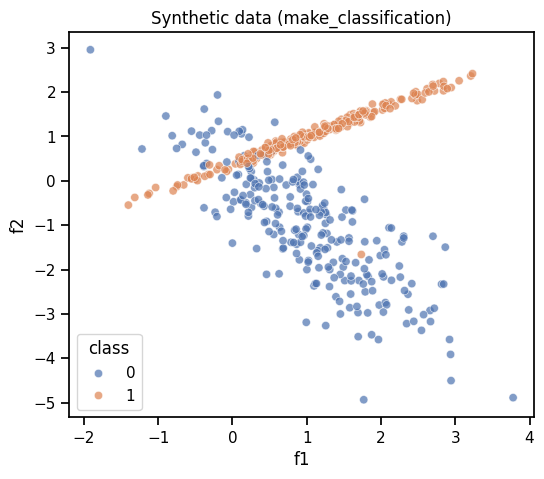

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate data
X_syn, y_syn = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)
df_syn = pd.DataFrame(X_syn, columns=['f1','f2'])
df_syn['class'] = y_syn

# TODO Event probabilities: P(class=1) and P(f1 > 0)
p_class1 = ...
p_f1_gt0 = ...
p_both = ...
print(f'P(class=1) = {p_class1:.4f}')
print(f'P(f1 > 0) = {p_f1_gt0:.4f}')
print(f'P(class=1 AND f1>0) = {p_both:.4f}')
print(f'P(class=1)*P(f1>0) = {p_class1 * p_f1_gt0:.4f} (compare to joint)')

# Expected values for f1 and f2
print(f'Expected f1 = {df_syn["f1"].mean():.4f}, Expected f2 = {df_syn["f2"].mean():.4f}')

# Train classifier (Random Forest)
X_train, X_test, y_train, y_test = train_test_split(df_syn[['f1','f2']], df_syn['class'], test_size=0.3, random_state=42, stratify=df_syn['class'])
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# TODO build a confusion matrix and metrics
cm = ...
disp = ...
disp.plot()
plt.title('Confusion Matrix (Random Forest on Synthetic Data)')
plt.show()

tn, fp, fn, tp = cm.ravel()

# TODO find false positive and false negative rates
p_fp = ...
p_fn = ...
print(f'False positive rate (count/total) = {fp}/{cm.sum()} = {p_fp:.4f}')
print(f'False negative rate (count/total) = {fn}/{cm.sum()} = {p_fn:.4f}')
print(f'Accuracy = {accuracy_score(y_test, y_pred):.4f}')

# Scatter plot of synthetic data colored by class
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_syn, x='f1', y='f2', hue='class', palette='deep', alpha=0.7)
plt.title('Synthetic data (make_classification)')
plt.show()